# Test EV control

Revise the EV control logic as: C->I, I->D, SOC high to low

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ev_ssm import ev_ssm
from tqdm import tqdm

In [5]:
# --- Response ---

sse = ev_ssm(ts=18, N=10000, step=1, tp=40,
             lr=0.1, lp=40, seed=2022, name="EVA")
sse.load_A("Aest.csv")


EVA: ts=18[H], 10000 EVs, Total Q=85.98 MWh
Online 2863, Q=71.58 MWh, SoC=0.7623
Power(MW): Pt=-7.9846, Pc=-7.9846, Pd=-0.0
Ctrl: 0=1517; 1=1346; 
EVA: Load A from Aest.csv.


20.7677758925091

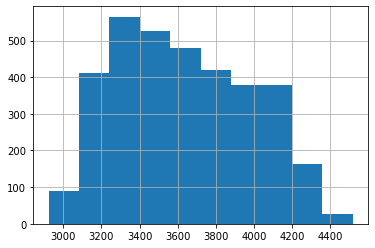

In [6]:
sse.ev['Qa'] = (sse.ev['tf'] - sse.ev['ts']) * sse.ev['Pc'] * sse.ev['nc'] - sse.ev['socd'] * sse.ev['Q']
sse.ev['Qr'] = sse.ev['Qa'].mean() + sse.ev['tt'] * sse.ev['Pd']
sse.ev['nr'] = sse.ev['Qr'] / sse.ev['Pc'] / sse.ev['nc'] * 3600 / 4

sse.ev['nr'].hist()

sse.ev['Qa'].mean()

In [ ]:
# --- Response ---

sse = ev_ssm(ts=10.4, N=10000, step=1, tp=40,
             lr=0.1, lp=40, seed=2022, name="EVA")
sse.load_A("Aest.csv")

x0 = sse.x0.copy()
print(sse.Prc)
sse.run(tf=10.4 + 2/3600, Pi=9,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=False)
print(sse.Prc)
x1 = sse.x0.copy()

In [ ]:
plt.bar(range(len(x0)), x0, label="x0")
plt.bar(range(len(x0)), x1, label="x0", alpha=0.5)

In [ ]:
sse = ev_ssm(ts=10.4, N=10000, step=1, tp=40,
             lr=0.1, lp=40, seed=2022, name="EVA",
             is_report=False)

# historical data
ev_num = pd.read_csv("ev_num.csv")

# calculate the sf
k1 = ev_num['ne'][(ev_num['time'] >= sse.ts) & (ev_num['time'] <= sse.ts+1/12)].mean()
k0 = ev_num['ne'][ev_num['time'] >= sse.ts].iloc[0]
k = k1 / k0

# estiamte FRC
sse.g_frc(nea=sse.ne*k)

In [ ]:
## Run to get the EV numbers within a day

# import joblib
# from joblib import Parallel, delayed

# Nt = 10000
# def rne(time):
#     sse1 = ev_ssm(ts=time, N=Nt, step=1, tp=40,
#                   lr=0.1, lp=60, seed=2022, name="EVA",
#                   is_report=False)
#     return sse1.ne

# # interval by minutes, 24H
# rnel = Parallel(n_jobs=joblib.cpu_count())(delayed(rne)(i) for i in np.arange(1/60, 24, 1/60))

# ev_num = pd.DataFrame()
# ev_num['time'] = np.arange(1/60, 24, 1/60)
# ev_num['ne'] = rnel
# ev_num.to_csv("ev_num.csv", index=False)